In [1]:
import numpy as np  
import os 
import matplotlib.pyplot as plt 
import pandas as pd


path = os.getcwd() 
filepath = os.path.join(path, "dataSet")

# load data 
letters = pd.read_csv(filepath+'/letter_recognition.txt', header=None)

In [3]:
y = letters.iloc[:,0].values
x = letters.iloc[:,1:].values
print y.shape, x.shape

(20000L,) (20000L, 16L)


In [4]:
print letters.info(), letters.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
0     20000 non-null object
1     20000 non-null int64
2     20000 non-null int64
3     20000 non-null int64
4     20000 non-null int64
5     20000 non-null int64
6     20000 non-null int64
7     20000 non-null int64
8     20000 non-null int64
9     20000 non-null int64
10    20000 non-null int64
11    20000 non-null int64
12    20000 non-null int64
13    20000 non-null int64
14    20000 non-null int64
15    20000 non-null int64
16    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None                  1             2             3            4             5   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000   

In [5]:
## pre-processing, for y categorical data 
y = map(lambda x: ord(x)-65, y)
## split the training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, train_size = 0.8, random_state=42)

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import validation_curve

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_learning_curve(estimator, title, X, y, cv=None,
                        train_sizes=np.linspace(0.1,
                        1.0,5 )):
    plt.figure() 
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, 
                                                           y, cv=cv, n_jobs=1,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std= np.std(train_scores, axis=1)
    test_scores_mean=np.mean(test_scores, axis=1)
    test_scores_std=np.std(test_scores, axis=1)
    plt.grid() 
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std, 
                    train_scores_mean+train_scores_std, alpha=0.1, 
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std, 
                    test_scores_mean+test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '*-', color='r', 
            label='Training score')
    plt.plot(train_sizes, test_scores_mean, '*-', color='b',
            label="cross-validation score")
    plt.legend(loc="best")
    return plt 

def plot_validation_curve(estimator, title, X, y, cv=None,
                          name="max_length",param_range=np.linspace(-3,3,5),
                          scoring="accuracy", n_jobs=1):
    plt.figure() 
    plt.title(title)
    plt.xlabel(name) 
    plt.ylabel("score")
    plt.ylim(0.0, 1.1) 
    lw = 2
    train_scores, test_scores=validation_curve(estimator, X,y,param_name=name, 
                                               param_range=param_range, cv=cv, 
                                               scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.semilogx(param_range, train_scores_mean, label="Training score",
    #         color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    #plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
    #         color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.plot(param_range, train_scores_mean, '*-', color='r', 
            label='Training score')
    plt.plot(param_range, test_scores_mean, '*-', color='b',
            label="cross-validation score")
    plt.legend(loc="best")
    return plt 

def plot_validation_curve_log(estimator, title, X, y, cv=None,
                          name="max_length",param_range=np.linspace(-3,3,5),
                          scoring="accuracy", n_jobs=1):
    plt.figure() 
    plt.title(title)
    plt.xlabel(name) 
    plt.ylabel("score")
    plt.ylim(0.0, 1.1) 
    lw = 2
    train_scores, test_scores=validation_curve(estimator, X,y,param_name=name, 
                                               param_range=param_range, cv=cv, 
                                               scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    return plt 

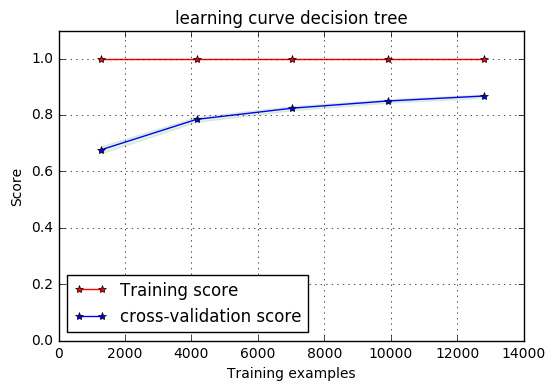

In [107]:


## plot the learning curve 
title='learning curve decision tree'
decisionClass = DecisionTreeClassifier(criterion="entropy")
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(decisionClass, title, X_train, y_train, cv=cv)
plt.show()

#### overfitting 

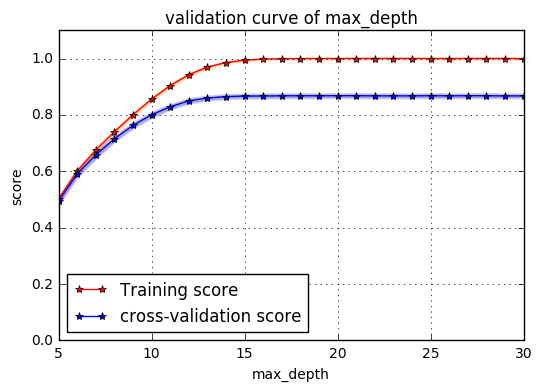

In [108]:
## tuning prameters of max_depth 
title='validation curve of max_depth'
param_name='max_depth'
param_ranges=np.linspace(5,30,26).astype(int)
plot_validation_curve(decisionClass, title, X_train, y_train, cv=cv,
                     name=param_name, param_range=param_ranges,
                     scoring="accuracy", n_jobs=1)
plt.grid()
plt.show()

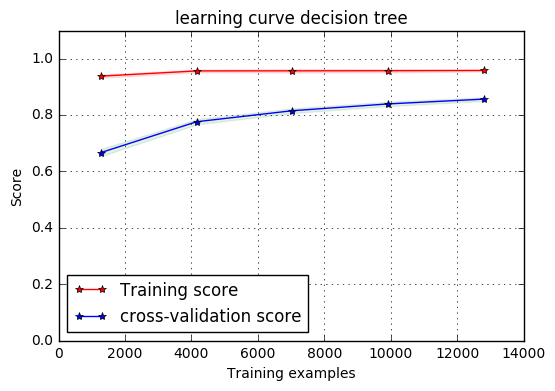

In [170]:
title='learning curve decision tree'
decisionClass = DecisionTreeClassifier(criterion="entropy", max_depth=13, 
                                      min_samples_split=4)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(decisionClass, title, X_train, y_train, cv=cv)
plt.show()

In [171]:
X_tr, X_cv, y_tr, y_cv=train_test_split(X_train,y_train, train_size = 0.8, random_state=42)
decisionClass.fit(X_tr, y_tr)
y_pcv=decisionClass.predict(X_cv)
y_pred = decisionClass.predict(X_test)
print decisionClass.tree_.node_count
print classification_report(y_cv, y_pcv)
print classification_report(y_test, y_pred)


2235
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       131
          1       0.81      0.78      0.79       128
          2       0.84      0.90      0.87       112
          3       0.82      0.84      0.83       148
          4       0.81      0.86      0.84       122
          5       0.78      0.86      0.82       131
          6       0.81      0.82      0.82       137
          7       0.77      0.79      0.78       119
          8       0.89      0.88      0.88       136
          9       0.88      0.83      0.85        98
         10       0.75      0.84      0.79       105
         11       0.95      0.90      0.93       104
         12       0.94      0.94      0.94       142
         13       0.83      0.88      0.85       114
         14       0.85      0.79      0.82       136
         15       0.91      0.82      0.86       135
         16       0.83      0.81      0.82       129
         17       0.85      0.81      0.

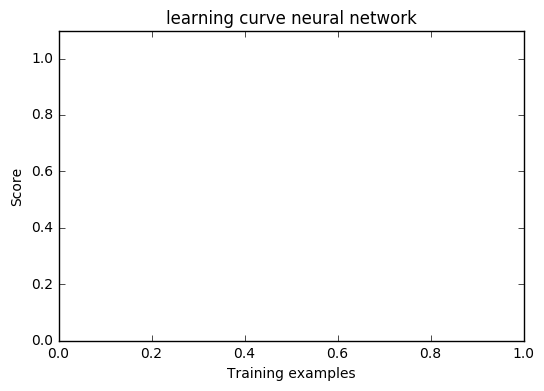

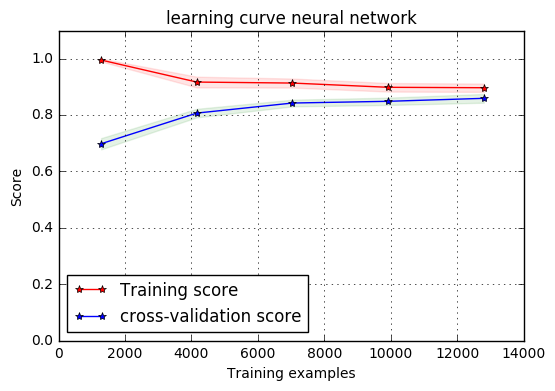

In [154]:
## neural network, 
from sklearn.neural_network import MLPClassifier 
mlp=MLPClassifier(hidden_layer_sizes=(100,50), activation=('logistic'),
                  alpha=0, solver='lbfgs', learning_rate_init=0.03)
title='learning curve neural network'

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(mlp, title, X_train, y_train, cv=cv)
plt.show()

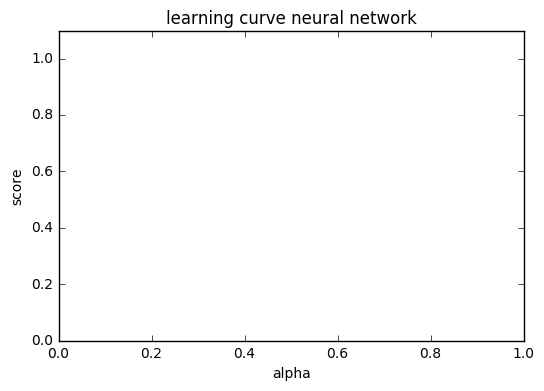

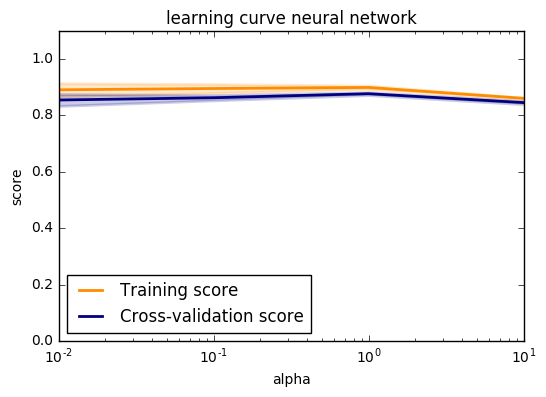

In [160]:
## visualize regularizaiton paramter 
alphas = np.logspace(-2, 1,4)
param_name='alpha'
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
mlp=MLPClassifier(hidden_layer_sizes=(100,50), activation=('logistic'), solver='lbfgs', learning_rate_init=0.03)
param_ranges= alphas
plot_validation_curve_log(mlp, title, X_train, y_train, cv=cv,
                     name=param_name, param_range=param_ranges,
                     scoring="accuracy", n_jobs=1)
plt.show()


In [161]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50), activation=('logistic'), solver='lbfgs', alpha=1.0, learning_rate_init=0.02)
X_tr, X_cv, y_tr, y_cv=train_test_split(X_train,y_train, train_size = 0.8, random_state=0)
mlp.fit(X_tr, y_tr)
y_pcv = mlp.predict(X_cv)
y_pred = mlp.predict(X_test)
print classification_report(y_cv, y_pcv)
print classification_report(y_test, y_pred)



             precision    recall  f1-score   support

          0       0.96      0.95      0.95       134
          1       0.86      0.84      0.85       113
          2       0.94      0.90      0.92       124
          3       0.84      0.90      0.87       129
          4       0.91      0.83      0.87       129
          5       0.81      0.87      0.84       109
          6       0.87      0.89      0.88       133
          7       0.87      0.80      0.84       130
          8       0.96      0.85      0.90       122
          9       0.91      0.90      0.91       135
         10       0.84      0.88      0.86       116
         11       0.95      0.91      0.93       133
         12       0.91      0.97      0.94       120
         13       0.92      0.86      0.89       111
         14       0.77      0.84      0.80       122
         15       0.95      0.92      0.93       133
         16       0.92      0.93      0.92       125
         17       0.80      0.89      0.84   

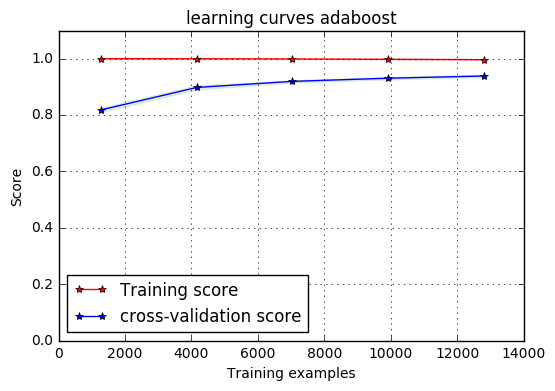

In [201]:
### adaboost decision tree 
from sklearn.ensemble import AdaBoostClassifier
title = "learning curves adaboost"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator= AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), 
                                algorithm="SAMME", n_estimators=100)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()

In [200]:
estimator.fit(X_tr, y_tr)
y_pcv = estimator.predict(X_cv)
y_pred = estimator.predict(X_test)
print classification_report(y_cv, y_pcv)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       131
          1       0.84      0.96      0.90       128
          2       0.97      0.97      0.97       112
          3       0.96      0.87      0.91       148
          4       0.97      0.96      0.97       122
          5       0.90      0.93      0.92       131
          6       0.91      0.94      0.93       137
          7       0.84      0.92      0.88       119
          8       0.92      0.93      0.93       136
          9       0.95      0.89      0.92        98
         10       0.97      0.91      0.94       105
         11       0.98      0.94      0.96       104
         12       0.99      0.99      0.99       142
         13       0.95      0.93      0.94       114
         14       0.91      0.99      0.95       136
         15       0.98      0.91      0.94       135
         16       0.95      0.97      0.96       129
         17       0.93      0.93      0.93   

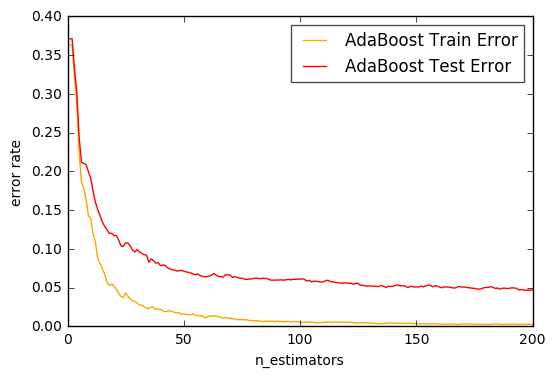

In [198]:
from sklearn.metrics import zero_one_loss
estimator= AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), 
                                algorithm="SAMME", n_estimators=200)
estimator.fit(X_train, y_train)
y_pred= estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ada_train_err =  np.zeros((200,))
for i, y_p_train in enumerate(estimator.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_p_train, y_train)
ada_test_err = np.zeros((200,))
for i, y_pred in enumerate(estimator.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(200) + 1, ada_train_err,label='AdaBoost Train Error',color='orange')
ax.plot(np.arange(200) + 1, ada_test_err,label='AdaBoost Test Error',color='red')
leg=ax.legend(loc='upper right')
leg.get_frame().set_alpha(0.7)
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

plt.show()


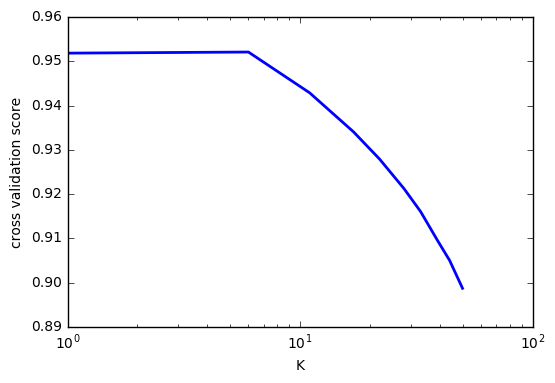

In [11]:
### knn 
## validate the k parameters 
title = "learning curve KNN"
from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsClassifier
ks = np.linspace(1, 50,10).astype(int)
errors = [] 
param_grid=dict(n_neighbors=ks)
cv = ShuffleSplit( train_size=0.8, n_splits=100, random_state=1)
knnclf = KNeighborsClassifier(weights='distance', algorithm='brute', 
                              metric='minkowski', p=2)
grid=GridSearchCV(knnclf, refit=False, param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
score = grid.cv_results_['mean_test_score']

plt.semilogx(ks, score, label='K', lw=2)
plt.xlabel('K')
plt.ylabel('cross validation score')
plt.show()


In [14]:
knnclf = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='brute', 
                              metric='minkowski', p=2)
knnclf.fit(X_train, y_train)
y_pred=knnclf.predict(X_test)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       149
          1       0.89      0.95      0.92       153
          2       0.98      0.95      0.97       137
          3       0.88      0.97      0.92       156
          4       0.96      0.97      0.96       141
          5       0.90      0.94      0.92       140
          6       0.96      0.96      0.96       160
          7       0.94      0.83      0.88       144
          8       0.97      0.93      0.95       146
          9       0.94      0.96      0.95       149
         10       0.93      0.92      0.92       130
         11       0.99      0.97      0.98       155
         12       1.00      0.98      0.99       168
         13       0.99      0.93      0.96       151
         14       0.93      0.97      0.95       145
         15       0.97      0.90      0.93       173
         16       0.98      0.96      0.97       166
         17       0.87      0.94      0.91   

In [182]:
### svm 
from sklearn import svm 

cs = np.logspace(-3,3,7)
param_grid = dict(C=cs)
estimator_sets = [svm.SVC(gamma=0.05), svm.SVC(gamma=0.5), svm.SVC(gamma=5)]
cv = ShuffleSplit( train_size=0.8,n_splits=10, random_state=1)
grids = []
for estimator in estimator_sets: 
    grid=GridSearchCV(estimator, refit=False, param_grid=param_grid, cv=cv)
    grid.fit(X_train, y_train)
    grids.append(grid)
    
score1 = grids[0].cv_results_['mean_test_score']
score2 = grids[1].cv_results_['mean_test_score']
score3 = grids[2].cv_results_['mean_test_score']
plt.subplot2grid((3,1),(0,0))
plt.semilogx(cs, score1, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score, gamma = 0.05')

plt.subplot2grid((3,1),(1,0))
plt.semilogx(cs, score2, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score,, gamma = 0.5')
plt.subplot2grid((3,1),(2,0))
plt.semilogx(cs, score2, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score,, gamma = 5')

plt.show()

KeyboardInterrupt: 